In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) =tf.keras.datasets.mnist.load_data()

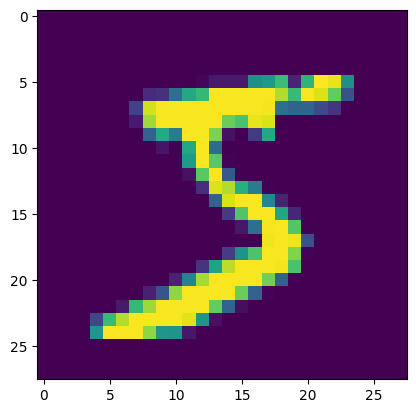

In [134]:
plt.imshow(x_train[0])

## Convolutional Neural Network

In [96]:
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_uniform", input_shape=(28, 28, 1)),
    tf.keras.layers.AveragePooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.AveragePooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.AveragePooling2D((2, 2)),

    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [97]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [98]:
history = model.fit(x_train, y_train, validation_split=.25, epochs=5)

Epoch 1/5
1407/1407 [==============================] - 14s 10ms/step - loss: 0.8271 - accuracy: 0.7543 - val_loss: 0.1678 - val_accuracy: 0.9554
Epoch 2/5
1407/1407 [==============================] - 15s 10ms/step - loss: 0.2756 - accuracy: 0.9168 - val_loss: 0.1267 - val_accuracy: 0.9670
Epoch 3/5
1407/1407 [==============================] - 16s 11ms/step - loss: 0.1944 - accuracy: 0.9432 - val_loss: 0.1016 - val_accuracy: 0.9721
Epoch 4/5
1407/1407 [==============================] - 17s 12ms/step - loss: 0.1600 - accuracy: 0.9531 - val_loss: 0.0761 - val_accuracy: 0.9769
Epoch 5/5
1407/1407 [==============================] - 15s 10ms/step - loss: 0.1396 - accuracy: 0.9582 - val_loss: 0.0768 - val_accuracy: 0.9785


In [99]:
model.save("../models/cnn_model")

INFO:tensorflow:Assets written to: ../models/cnn_model/assets


INFO:tensorflow:Assets written to: ../models/cnn_model/assets


## Evaluation

### Metrics

In [100]:
pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [101]:
y_pred = list()
for prediction in pred:
    y_pred.append(np.argmax(prediction))

In [102]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

(<Figure size 700x700 with 1 Axes>,
 <AxesSubplot: xlabel='predicted label', ylabel='true label'>)

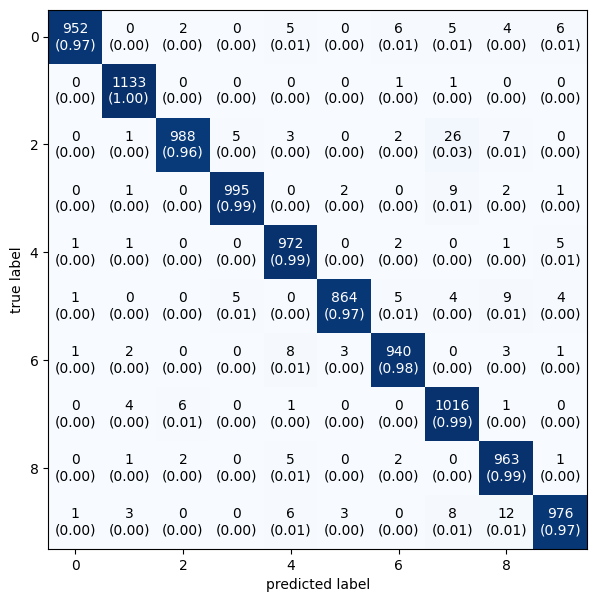

In [103]:
plot_confusion_matrix(confusion, figsize=(7, 7), show_normed=True)

### Accuracy vs Validation Accuracy

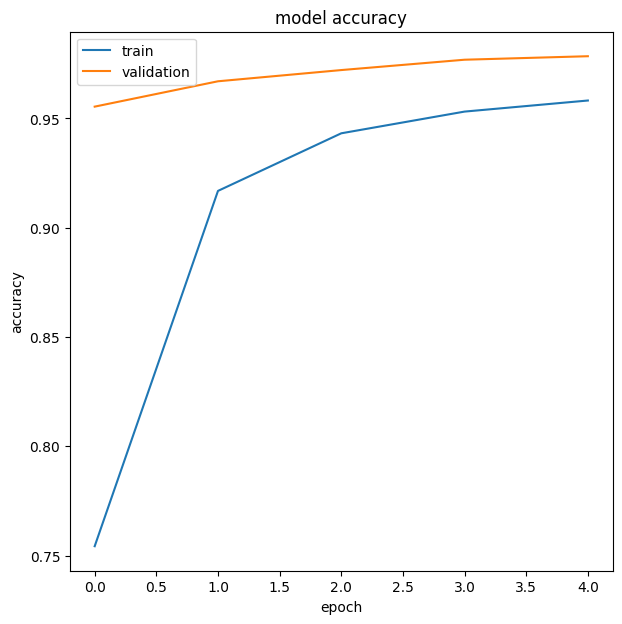

In [104]:
plt.figure(figsize=(7, 7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Loss vs Validation Loss

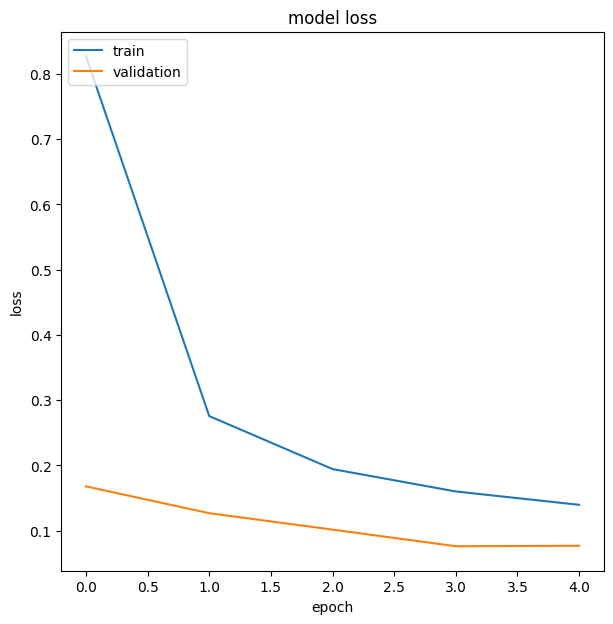

In [105]:
plt.figure(figsize=(7, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### GRAD-Cam

## New images

In [19]:
import cv2
import difflib

In [7]:
model = tf.keras.models.load_model("../models/cnn_model/")

In [8]:
image_path = "../data/206841.jpg"

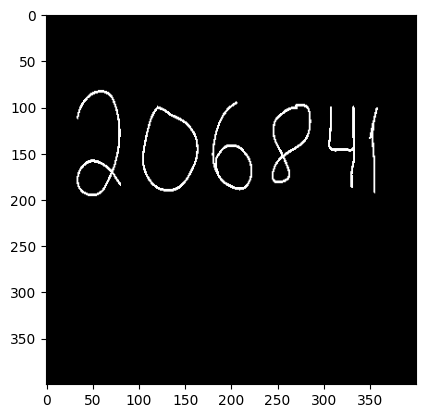

In [9]:
image = cv2.imread(image_path)
image = cv2.resize(image, (400, 400))
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image = cv2.adaptiveThreshold(image, 255, 1, 1, 11, 2)

contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

digit_boxes = []
padding = 10
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x-padding, y-padding), (x + w + padding, y + h + padding), (0, 0, 255), 1)
    digit_boxes.append((x-padding, y-padding, w+padding, h+padding))

plt.imshow(image, cmap="gray")
plt.show()

In [10]:
digit_boxes.sort(key=lambda r: r[0])

In [11]:
digit_boxes

[(23, 72, 58, 125),
 (94, 89, 71, 103),
 (169, 84, 54, 107),
 (234, 87, 53, 96),
 (295, 89, 39, 99),
 (339, 91, 20, 103)]

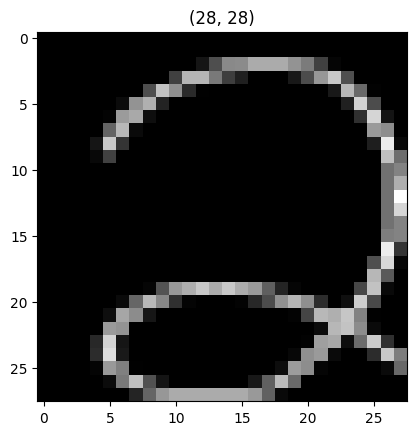

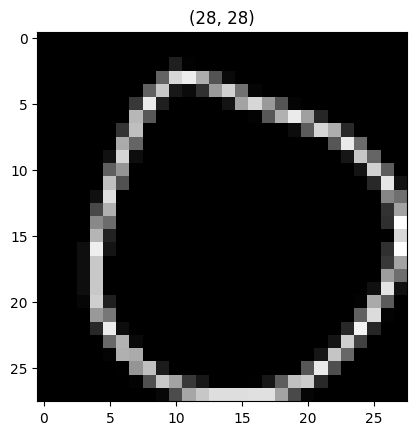

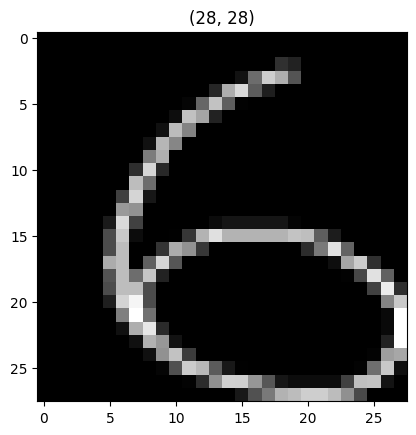

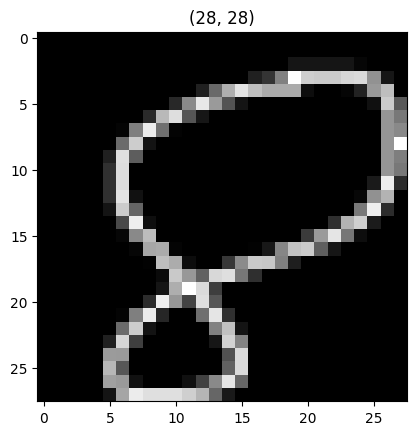

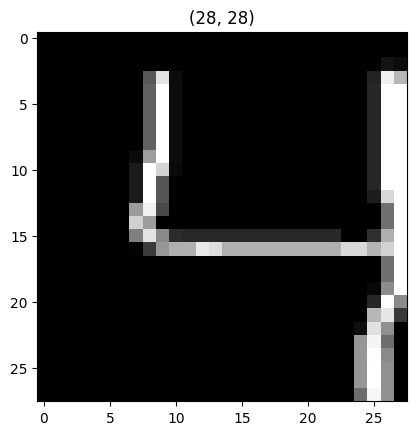

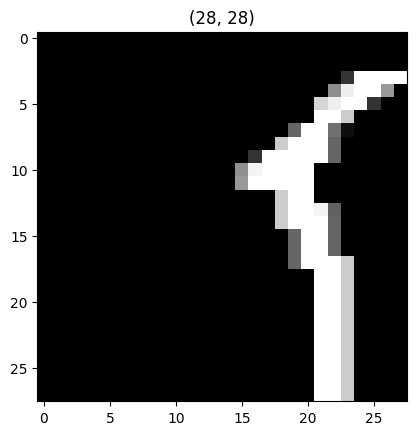

In [12]:
new_images = []
for contour in digit_boxes:
    _image = image[contour[1]:contour[1]+contour[3],contour[0]:contour[0]+contour[2]]
    _image = cv2.resize(_image, (28, 28), interpolation=cv2.INTER_AREA)
    # _image = cv2.copyMakeBorder(_image, 10, 10, 10, 10, cv2.BORDER_CONSTANT, None, value = 0)
    new_images.append(_image)
    plt.imshow(_image, cmap="gray")
    plt.title(_image.shape)
    plt.show()

In [13]:
new_images = np.array(new_images)
new_images

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,  10, 105],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 110, 200,  15],
        [  0,   0,   0, ..., 194,  19,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ..

In [14]:
predictions = model.predict(new_images)

1/1 [==============================] - 0s 369ms/step


In [15]:
predictions.shape

(6, 10)

In [16]:
number = ""
for pred in predictions:
    digit = str(np.argmax(pred))
    number += digit

print(number)

206843


In [21]:
possibilities = ["206841", "214542", "206890", "204368", "202122"]

In [22]:
difflib.get_close_matches(number, possibilities)

['206841', '206890', '204368']